
#Importing Libraries


Credits: T. Kardi and Jason

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

#Generate Data:Linear Separable Data

In [ ]:
X_train = np.array([[  7. ,  20. ],
       [  8. ,  12. ],
       [  9. ,  19. ],
       [ 10. ,  17. ],
       [ 11. ,  15. ],
       [ 13. ,  14. ],
       [ 14. ,  12. ],
       [ 15. ,  14. ],
       [ 15. ,  17. ],
       [ 16. ,  16. ],
       [  4. ,  15. ],
       [  5.5,  12. ],
       [  7. ,  10. ],
       [  8. ,  10. ],
       [  9. ,   9. ],
       [ 10. ,   8. ],
       [ 11. ,   5. ],
       [ 12. ,   7. ],
       [ 12. ,   9. ],
       [ 13. ,  10. ]])
y_train = ([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1])
print(X_train)
print(y_train)
print(X_train.shape)
print(len(y_train))


[[ 7.  20. ]
 [ 8.  12. ]
 [ 9.  19. ]
 [10.  17. ]
 [11.  15. ]
 [13.  14. ]
 [14.  12. ]
 [15.  14. ]
 [15.  17. ]
 [16.  16. ]
 [ 4.  15. ]
 [ 5.5 12. ]
 [ 7.  10. ]
 [ 8.  10. ]
 [ 9.   9. ]
 [10.   8. ]
 [11.   5. ]
 [12.   7. ]
 [12.   9. ]
 [13.  10. ]]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
(20, 2)
20


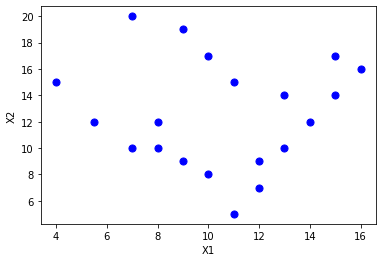

In [ ]:

plt.scatter(X_train[:,0],X_train[:,1],c='b',s=50)
plt.xlabel('X1')
plt.ylabel('X2');

In [ ]:
target_names=['-1','+1']
target_names

['-1', '+1']

In [ ]:
idxPlus = []
idxMin = []
for i, x in enumerate(y_train):
  if x > 0:
    idxPlus.append(i)
  else:
    idxMin.append(i)

In [ ]:
print(idxMin)
print(idxPlus)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


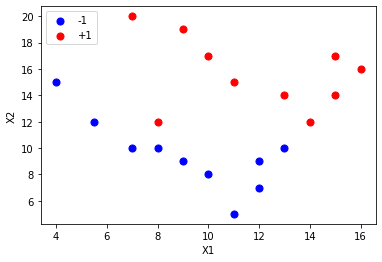

In [ ]:
plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=50)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
plt.xlabel('X1')
plt.ylabel('X2');


In [ ]:
svc = svm.SVC(kernel='poly',degree=2,C=100).fit(X_train,y_train)
svc

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.get_params(True)

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
lbX1=math.floor(min(X_train[:,0]))-1
ubX1=math.ceil(max(X_train[:,0]))+1
lbX2=math.floor(min(X_train[:,1]))-1
ubX2=math.ceil(max(X_train[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

[3, 17, 4, 21]

Text(0.5, 1.0, 'Linearly Separable')

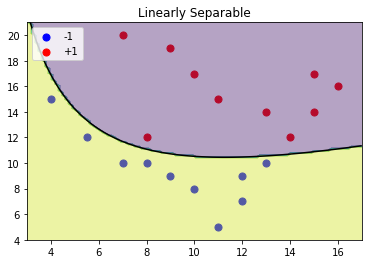

In [ ]:
plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=50)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Linearly Separable')


In [ ]:
svc.score(X_train,y_train)

1.0

Text(0.5, 1.0, 'Margin and Support Vectors')

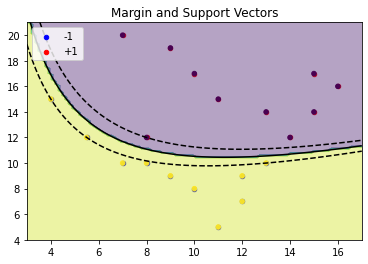

In [ ]:
plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=20)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=20)
plt.legend(target_names,loc=2)
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=20,facecolors='none')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=20,alpha=0.95);

plt.title('Margin and Support Vectors')


svc.n_support_


In [ ]:
svc.n_support_


array([1, 3], dtype=int32)

In [ ]:
svc.support_vectors_


array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

In [ ]:
svc.score(X_train, y_train)


1.0

In [ ]:
print(svc.predict([[8,15]]))

[-1]


Text(0.5, 1.0, 'Prediction')

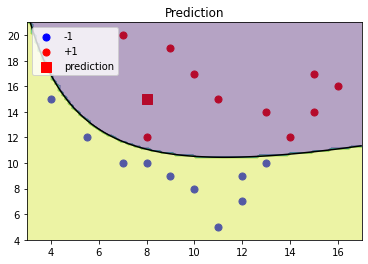

In [ ]:

plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=50)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=50)
plt.scatter(8,15,c='r',marker='s',s=90)
plt.legend(['-1','+1','prediction'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Prediction')
